<h1>DSM150
Neural Network
Coursework</h1>

Student Number: RC0086
Assignment: Neural Network Boston Housing Price 

<h2>1. Introduction</h2>

In this coursework the universal workflow of DLWP will be applied to the Boston Housing Price dataset. The Boston Housing Price Dataset is an example of regression. It means that a continous value is predicted. 
It is basically the opposite of classification, where a discrete label is predicted. The code reference was partially used from the book Deep Learning with Python. 

<h4>1.1 Aim of this workflow</h4>

The main aim is to create a model that is able to predict the median price of a home. The dataset contains multiple completely different data points such as crime rate, tax rate etc., that all together influence the price of the house. Thus, a model must be created that can overcome the difficulty of having over 500+ values and different properties.  

<h4>1.2 Importing the dataset</h4>

The boston_housing dataset is a built in dataset in keras and can just be imported directly.

In [18]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

<h2>2. Methodology</h2>

<h4>2.1 Exploring the data</h4>

First of all it is important to understand the shape,form and type of the data. We can see that the dataset contains 506 instances and 13 attributes. Then it is important to visualize and explore data in detail. When calling the .decribe() method one can see that the values are all over the place, meaning some normalization must be done on the data. Also, some attributes have rather high correlation like NOX and INDUS with about 0.76 or DIS and NOX with -0.77. The high correlation might indicate that perhaps some features might be removed completely. 

In [3]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [17]:
import pandas as pd
from sklearn.datasets import load_boston

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [19]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [21]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [22]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<h4>2.2 Normalization</h4>

The exploratory part clearly showed that the dataset must be normalized as the values of some attributes are in completely different ranges. 
Thus normalization must be done feature-wise. This happens by substracting the mean from the feature and divide by the standard deviation, so it centeres around 0.

In [23]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /=std

#it must be noted that the features are computed from the training data

<h4>2.3 Building the Model</h4>

Now that the training and test data ist normalized, the model can be build. As there are only few samples, a small model with 64 units each will be used. The decision to use a small model is to mitigate overfitting as small models tend to overfit easier. Here the model ends with a single unit and no activation as this is typical when you are trying to predict a single continous value. With an activatoin function it would actually only be able to output 0 or 1, but due to the linearity it can output any value.

Also, mse (mean squared error) is used here, as it is a widely used loss function for regression problems. "MAE" mean absolute error is the absolute value of the difference between predictions and the target.

In [25]:
def build_model():
  model = keras.Sequential([
                            layers.Dense(64, activation='relu'),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)
  ])

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

<h4>2.4 Validating the Model</h4>

As there are only few data points here, it is not wise to split the data into a training and validation set. The validation scores might have a high variance with regard to the validation split.

Thus, K-fold cross-validation will be used. The dataset will be split in K portions, instantiating k identical models, and train each of them on K-1 partitions, while the evaluation is happening on the remaining ones.

For the validation score the average of the K-scores are taken. Here one can see that different runs shows different scores. The average value is around 2.6, this means that the prices are off by around 2600 dollars on average. One might argue that to be a significant difference as the prices only range from around 10,000 dollars to 50,000 dollars.

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #%d' % i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate (
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0)
  
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [27]:
all_scores

[2.31679368019104, 2.874845504760742, 2.5375735759735107, 2.549072504043579]

In [28]:
np.mean(all_scores)

2.569571316242218

<h5>2.4.1 Longer Training</h5>

Now the model will be trained for 500 rather than for 100 epochs. 

In [30]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('processing fold #%d' % i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate (
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, 
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


<h2>3. Results</h2>

Finally, the avarage validation scores will be plotted to see when the model starts overfitting. Here the first plot is difficult to see, as the first 10 data points are on a different scale. Thus, a second plot will be created in order to get a better vizualisation of the curve.

In [31]:
average_mae_history = [
                       np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

<h4>3.1 Plot 1 (Bad Scale)</h4>

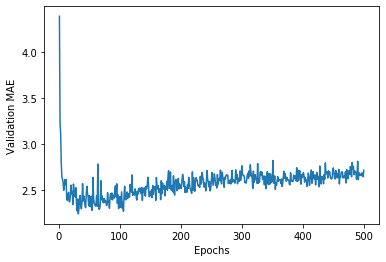

In [32]:
import matplotlib.pyplot as plt


plt.plot(range(1, len(average_mae_history) +1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

<h4>3.2 Plot 2 (Better Scale)</h4>

Here one can see that the model is not really improving after a certain time anymore. This happens after around 70 to 80 epochs. Thus, another model must be trained with the improved parameters. 

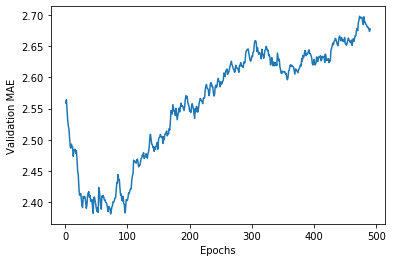

In [33]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

<h4>3.3 Final Model with results</h4>

Finally, for the last step the best parameter for the epochs has been figured out in the previous runs. In order to create the best possible model, we will use the parameter of 80 epochs. The final model shows a loss of 16.85 and a mean absolute error of 2.57. 

In [34]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 16.8575 - mae: 2.5697


In [35]:
test_mae_score

2.569737672805786

<h2>4. Conclusion</h2>

As a conclusion the main points should be summarized. The notebook started off by importing the Boston Housing Price dataset. Then, some basic methods were performed to understand the structure, datatype, ..., of the dataset. With further visualisations and correlations one saw that the model must be normalized in order to train it correctly. Later, a small model with 64 units was used with relu as activation and mse as the validation score. Also, due to the small sample k-fold cross validation was used. Finally the model showed that 80 epochs would be the best parameter and thus the model was trained again. Unfortunately, it showed that the final result is still of by around 2570$, which considering the scale is actually a significant amount. 

As a last step, a prediction will be tried on the test data to predict the price of a random house. In this case the first house in the test data will be used. Here one can see that the predicted price is 8500 dollars, which is almost 1500 dollars away from the price target of 10000 dollars from the actual house. 

All in all, it must be stated that the model works, but you should definetely not rely on it as it can only provide rough estimates on price. Thus, it can only be used as a reference, however not as a deciding measure in case a precise prediction is needed. 

To improve the model, one might try different things. First of all, there might be done more in the exploratory phase of the analyiis. The correlations showed promising targets, perhaps one could make some tweaks there. Also the model could be trained on a different composition of layers. Nevertheless, the most promising step might be to look at the dataset & correlations more and delete data in order to make the dataset smaller and more homogenous. 

In [36]:
predictions = model.predict(test_data)

In [37]:
predictions[0]

array([8.572617], dtype=float32)